### 24/4


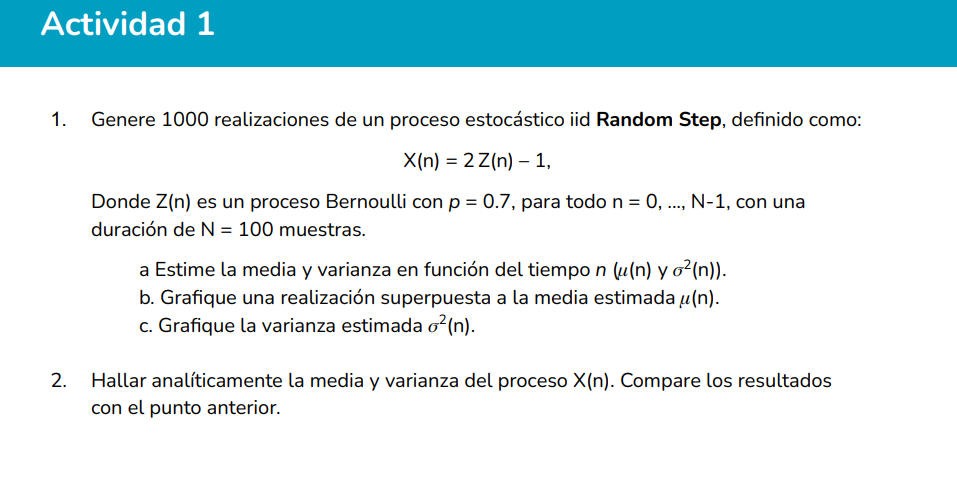

Z(n) es un proceso bernoulli con p = 0.7, i.e. Z(0) es Ber(p), Z(1) es Ber(p) ... Z(99) es Ber(p)
Luego X(n) = 2Z(n) - 1

N = 100 Largo o duración del proceso

R = 10000 Cantidad de veces que quiero realizar el proceos

Para simular hay q usar np.random.binomial(n, p, size)
n es la cantidad de ensayos a hacer. Recordar que la binomial cuenta éxitos en n ensayos. Si n es 1 estoy haciendo un solo ensayo, eso es una bernoulli

In [2]:
import numpy as np
N = 100 #largo del proceso
p = 0.7 #prob de éxito

Z = np.random.binomial(n = 1, p = p, size = N)

print(Z, Z.shape)
#Z es un array de largo 100. Esta es UNA realización del proceso Z(n)

R = 1000
Z = np.random.binomial(n = 1, p = p, size = [R, N])

print(Z, Z.shape)
#ahora Z es una matriz de 1000 filas (1000 realizaciones de Z(n)) por 100 columnas (Z(0), Z(1), ..., Z(99))



[1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0
 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1] (100,)
[[0 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [1 0 0 ... 1 1 1]
 ...
 [1 1 0 ... 1 1 1]
 [1 1 0 ... 1 1 0]
 [0 1 1 ... 1 0 1]] (1000, 100)


In [3]:
#Me la juego:
X = 2*Z - 1
print(X, X.shape)

#parece correcto
#notas que tengo 1000 filas, 1000 realizaciones en las filas, y el tiempo evoluciona con las columnas

[[-1  1  1 ...  1  1  1]
 [-1  1  1 ...  1  1  1]
 [ 1 -1 -1 ...  1  1  1]
 ...
 [ 1  1 -1 ...  1  1  1]
 [ 1  1 -1 ...  1  1 -1]
 [-1  1  1 ...  1 -1  1]] (1000, 100)


Vamos con la media. La media (a priori) evoluciona con el tiempo n

$\mu$(n)

Parémonos en $n = n_0$, para ese $n_0$, tengo 1000 realizaciones del proceso X. Para estimar $\mu(n_0)$ hago la media de los 1000 valores de la columna $n_0$

In [4]:
n0 = 0
X_n0 = X[:, n0]

mu = np.empty(shape = N)

for i in range(N):
    X_i = X[:, i]
    mu_i =  np.mean(X_i)
    mu[i] = mu_i

print(mu)

[0.386 0.422 0.38  0.414 0.352 0.352 0.378 0.358 0.35  0.426 0.376 0.358
 0.406 0.424 0.43  0.408 0.428 0.396 0.376 0.37  0.382 0.382 0.364 0.458
 0.362 0.334 0.438 0.418 0.402 0.444 0.406 0.388 0.392 0.404 0.396 0.368
 0.414 0.444 0.436 0.432 0.398 0.428 0.424 0.388 0.38  0.41  0.394 0.37
 0.376 0.432 0.422 0.366 0.368 0.43  0.454 0.388 0.424 0.384 0.38  0.386
 0.438 0.39  0.364 0.378 0.4   0.392 0.424 0.42  0.382 0.372 0.414 0.372
 0.386 0.374 0.386 0.368 0.432 0.44  0.428 0.414 0.392 0.418 0.43  0.394
 0.328 0.418 0.418 0.404 0.396 0.43  0.442 0.402 0.444 0.386 0.428 0.34
 0.37  0.402 0.44  0.454]


Tiene sentido: 

$
E[X(n)] = 2 E[Z(n)] - 1 = 2 p - 1 = 0.4
$

Por supuesto hay una forma más rápida:

In [5]:
mu =  np.mean(X, axis = 0) #axis = 0 indica que se hacen las medias de las columnas

print(mu)

#Es una joda python. ¿Un lengauje en serio no tenés?
sigma_Z =  np.var(Z, axis = 0)

print(sigma_Z)

sigma_X = np.var(X, axis = 0)

[0.386 0.422 0.38  0.414 0.352 0.352 0.378 0.358 0.35  0.426 0.376 0.358
 0.406 0.424 0.43  0.408 0.428 0.396 0.376 0.37  0.382 0.382 0.364 0.458
 0.362 0.334 0.438 0.418 0.402 0.444 0.406 0.388 0.392 0.404 0.396 0.368
 0.414 0.444 0.436 0.432 0.398 0.428 0.424 0.388 0.38  0.41  0.394 0.37
 0.376 0.432 0.422 0.366 0.368 0.43  0.454 0.388 0.424 0.384 0.38  0.386
 0.438 0.39  0.364 0.378 0.4   0.392 0.424 0.42  0.382 0.372 0.414 0.372
 0.386 0.374 0.386 0.368 0.432 0.44  0.428 0.414 0.392 0.418 0.43  0.394
 0.328 0.418 0.418 0.404 0.396 0.43  0.442 0.402 0.444 0.386 0.428 0.34
 0.37  0.402 0.44  0.454]
[0.212751 0.205479 0.2139   0.207151 0.219024 0.219024 0.214279 0.217959
 0.219375 0.204631 0.214656 0.217959 0.208791 0.205056 0.203775 0.208384
 0.204204 0.210796 0.214656 0.215775 0.213519 0.213519 0.216876 0.197559
 0.217239 0.222111 0.202039 0.206319 0.209599 0.200716 0.208791 0.212364
 0.211584 0.209196 0.210796 0.216144 0.207151 0.200716 0.202476 0.203344
 0.210399 0.204204 0.205056

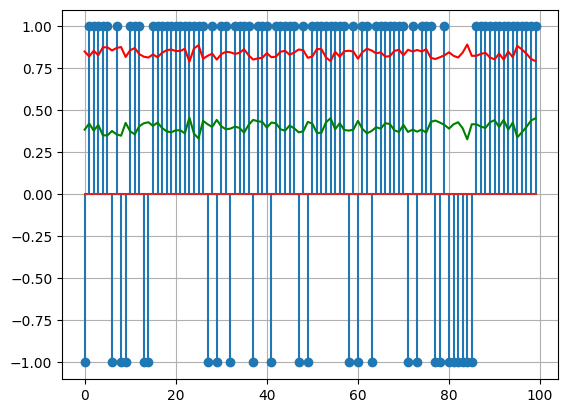

In [6]:
import matplotlib.pyplot as plt
X_0 = X[0, :] #tomo la primer realización de X

plt.stem(X_0)
plt.plot(mu, color = 'g')
plt.plot(sigma_X, color = 'red')
plt.grid(True)
plt.show()

La varianza de X da 4 * Var(z) = 0.84

La casa está en orden

Vamos con otro

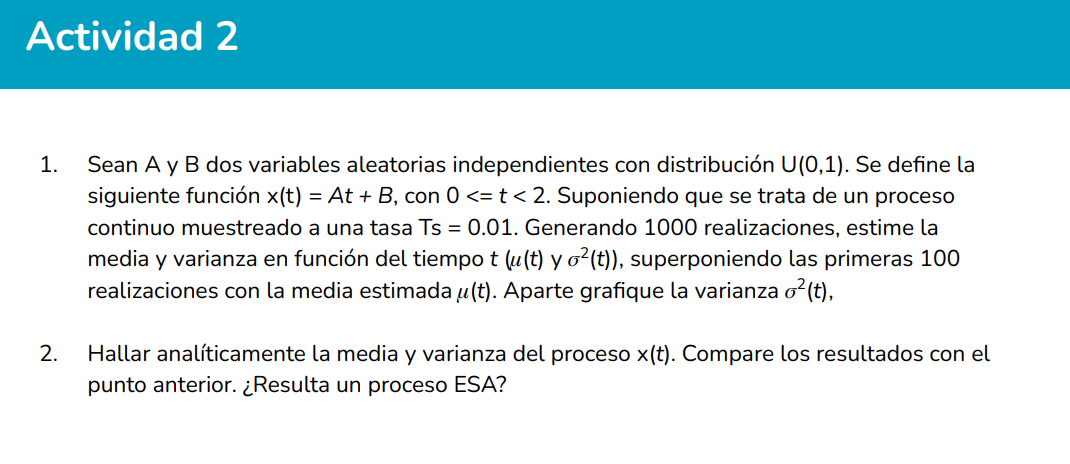

In [7]:
R = 1000 #cantidad de realizaciones que quiero
A = np.random.uniform(low = 0, high = 1, size =  R)
B = np.random.uniform(low = 0, high = 1, size = R)

N = int(2/0.01) #cantidad de muestar, 200
t = np.linspace(start = 0, stop = 2, num = N)

#eje horizontal --> tiempo
#eje vertical --> realizaciones
#matriz de 1000 (R) filas y 200 (N) columnas

#esto me lo pasó el chat
M = A[:, np.newaxis] * t + B[:, np.newaxis]
#explicación: A[:, np.newaxis] convierte a A en una matriz de 1000x1 (o sea, la transpone)
print(A.shape, A[:, np.newaxis].shape)
print(A[0:10], A[:, np.newaxis][0:10])

#lo mismo con B
print(t.shape, (A[:,np.newaxis]*t).shape)

#A^(T)*t da una matriz de 1000 filas x 200 columnas
#la función np.newaxis le agrega una dimensión a A. A es de (1000,) y A[:, np.newaxis] es de (1, 1000)


#print(M, M.shape)

(1000,) (1000, 1)
[0.23994105 0.8254465  0.58538988 0.41604057 0.55014468 0.48797793
 0.81017066 0.37488689 0.9663488  0.92082152] [[0.23994105]
 [0.8254465 ]
 [0.58538988]
 [0.41604057]
 [0.55014468]
 [0.48797793]
 [0.81017066]
 [0.37488689]
 [0.9663488 ]
 [0.92082152]]
(200,) (1000, 200)


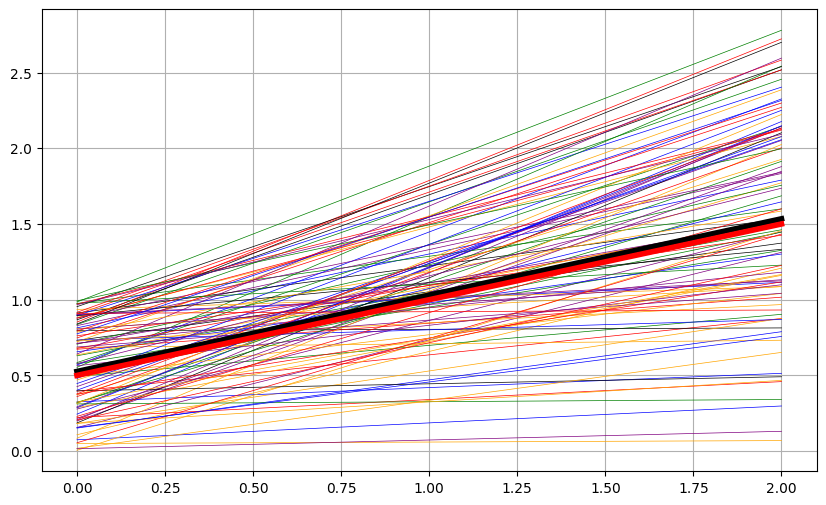

In [8]:
plt.figure(figsize= (10,6))

colores = ['red', 'blue', 'green', 'orange', 'purple', 'black']

for i in range(100):
    color = np.random.choice(colores)
    plt.plot(t, M[i], color = color, linewidth = 0.5)

medias = np.mean(M, axis = 0)
plt.plot(t, medias, color = 'black', linewidth = 4)#media estimada
plt.plot(t, 0.5*t + 0.5, color = 'red', linewidth = 4)#media teórica
plt.grid(True)
plt.show()

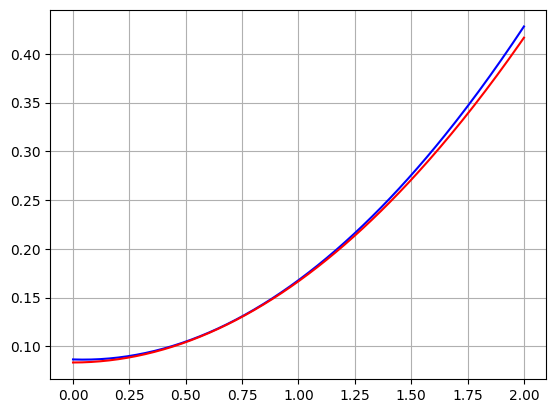

In [9]:
sigma = np.var(M, axis = 0)

plt.plot(t, sigma, color = 'blue') #desvío estimada
plt.plot(t, 1/12 * t*t + 1/12, color = 'red') #desvío teórico

plt.grid(True)
plt.show()


### Cuentas

$
E[x(t)] = E[A.t + B] = E[A].t + E[B] = \frac{1}{2}.t + \frac{1}{2}
$

$
V[x(t)] = V[A.t + B] = V[A.t] + V[B] = V[A].t^2 + V[B] = \frac{1}{12}.t^2 + \frac{1}{12}
$

El proceso NO es ESA xq la media cambia con el tiempo

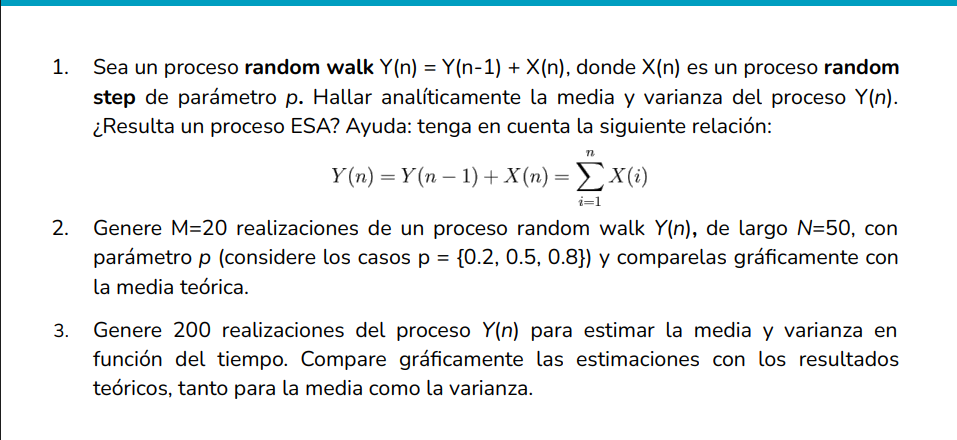

Recordar que el proceso random step se define así:

$
X(n) = 2.Z(n) - 1
$

Donde $Z(n)\sim i.i.d \quad Ber(p) \:\forall \: n$

Es decir, avanzo un paso con probabilidad p o retrocedo un paso con probabilidad 1 - p

un random walk es una suma de random steps

### Media:
OBS: $E[X(i)] = E[2.Z(n) - 1] = 2.p - 1$

$
E[Y(n)] = E[ \Sigma _{i = 1} ^{n} X(i)] = n.E[X(i)] = n(2p-1)
$

Obs: crece con el tiempo. Si $p \ne \frac{1}{2}$ no es ESA. Si fuera 1/2 habría que ver la autocorrelación
### Varianza
OBS: $V[X(i)] = V[2Z(n) - 1] = 2^2V[Z(n)] = 4p(1-p)$

$
V[Y(n)] = V[\sum_{i = 1}^{n} X(i)] =(i.i.d) \sum_i V[X(i)] = n.V[X(i)] = n4p(1-p)
$

In [110]:
R = 20 #realizaciones
N = 50 #largo de mi proceso

p = 0.2 #prob de éxito

#realizo 50 experimentos bernoulli:
Z = np.random.binomial(n = 1, p = p, size = (R, N))# de nuevo, el eje vertical son mis realizaciones y el horizontal es el eje de tiempos
#recordar que la binomial cuenta la cantidad de éxitos en n ensayos, donde cada ensayo es una bernoulli p. Hacer un ensayo es hacer una bernoulli

#Pongo cada uno de mis randomstep en un vector X
X = 2*Z - 1
#Donde Z valga 1, X valdrá 1 (avanzo un paso)
#Donde Z valga 0, X valdrá -1 (retrocedo un paso)

Y = np.cumsum(X, axis = 1)
#me estaba rompiendo la cabeza hasta que el chat me tiró esta función que resuelve exactamente lo que quería. Que viva el siglo XXI

#print(X)
#print(Y)


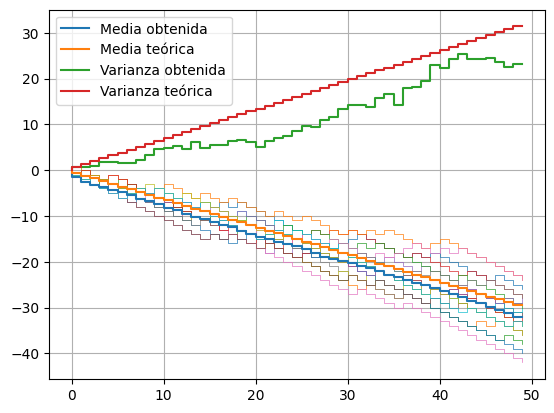

In [111]:
n = np.arange(N)#eje de tiempos

for i in range(R):
    plt.step(n, Y[i], where = 'post', linewidth = 0.5) #grafico mis realizaciones

mu_obt = np.mean(Y, axis = 0) #media observada
mu_teo = n*(2*p-1)#media teórica
plt.step(n, mu_obt, label='Media obtenida')
plt.step(n, mu_teo, label = 'Media teórica')

var_obt = np.var(Y, axis = 0)#varianza obtenida
var_teo = n*4*p*(1-p)#varianza teórica
plt.step(n, var_obt, label='Varianza obtenida')
plt.step(n, var_teo, label = 'Varianza teórica')

plt.grid(True)
plt.legend()
plt.show()

### Cambio a p = 0.5

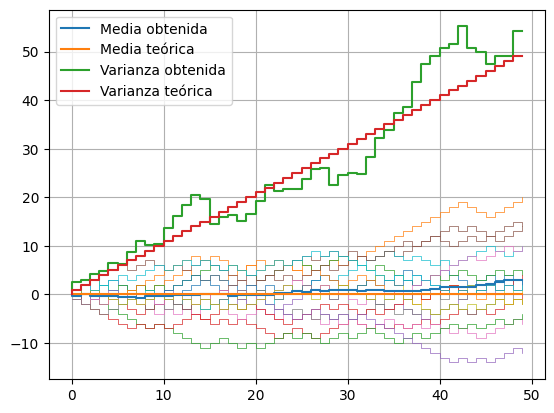

In [112]:
p = 0.5

Z = np.random.binomial(n = 1, p = p, size = (R, N))
X = 2*Z - 1
Y = np.cumsum(X, axis = 1)

for i in range(R):
    plt.step(n, Y[i], where = 'post', linewidth = 0.5) #grafico mis realizaciones

mu_obt = np.mean(Y, axis = 0) #media observada
mu_teo = n*(2*p-1)#media teórica
plt.step(n, mu_obt, label='Media obtenida')
plt.step(n, mu_teo, label = 'Media teórica')

var_obt = np.var(Y, axis = 0)#varianza obtenida
var_teo = n*4*p*(1-p)#varianza teórica
plt.step(n, var_obt, label='Varianza obtenida')
plt.step(n, var_teo, label = 'Varianza teórica')

plt.grid(True)
plt.legend()
plt.show()

### Cambio a p = 0.8

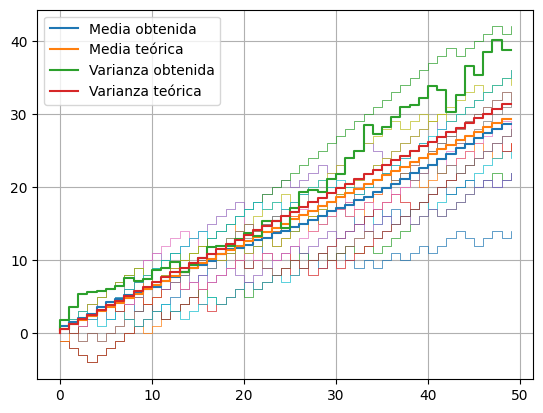

In [113]:
p = 0.8

Z = np.random.binomial(n = 1, p = p, size = (R, N))
X = 2*Z - 1
Y = np.cumsum(X, axis = 1)

for i in range(R):
    plt.step(n, Y[i], where = 'post', linewidth = 0.5) #grafico mis realizaciones

mu_obt = np.mean(Y, axis = 0) #media observada
mu_teo = n*(2*p-1)#media teórica
plt.step(n, mu_obt, label='Media obtenida')
plt.step(n, mu_teo, label = 'Media teórica')

var_obt = np.var(Y, axis = 0)#varianza obtenida
var_teo = n*4*p*(1-p)#varianza teórica
plt.step(n, var_obt, label='Varianza obtenida')
plt.step(n, var_teo, label = 'Varianza teórica')


plt.grid(True)
plt.legend()
plt.show()

### Macanudo. Es más, muy macanudo

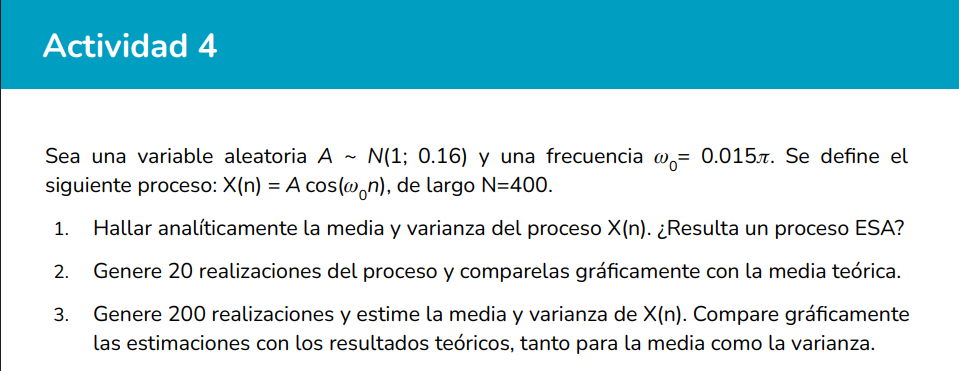

$
E[X(n)]=E[A.cos(\omega_0n)] = E[A]cos(\omega_0n) = cos(\omega_0n)
$ ==> No puede ser ESA xq la esperanza no es cte

$
V[Acos(\omega_0n)]=cos^2(\omega_0n)V[A] = 0.16cos^2(\omega_0n)
$

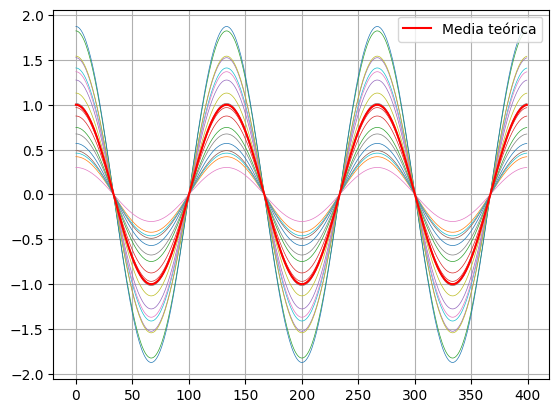

In [131]:
w0 = 0.015*np.pi
N = 400 #largo del proceso
R = 20 #Realizaciones
A = np.sqrt(0.16)*np.random.randn(R) + 1
n = np.arange(N) #eje de tiempos
X = A.reshape(R, 1) * np.cos(w0 * n)

for i in range(R):
    plt.plot(n, X[i], linewidth = 0.5)

plt.plot(n, np.cos(w0 * n), label = 'Media teórica', color = 'red')
plt.grid(True)
plt.legend()
plt.show()

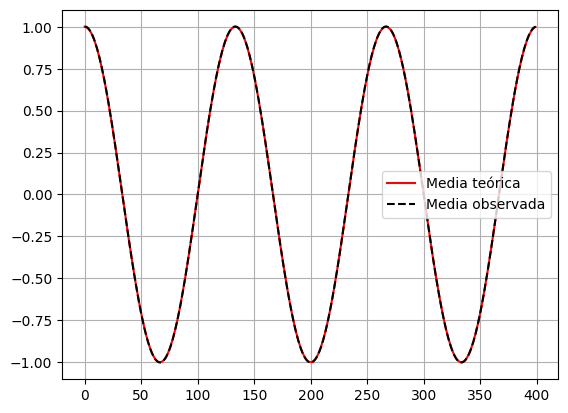

In [132]:
R = 200 #Realizaciones
A = np.sqrt(0.16)*np.random.randn(R) + 1
n = np.arange(N) #eje de tiempos
X = A.reshape(R, 1) * np.cos(w0 * n)

#media
plt.plot(n, np.cos(w0 * n), label = 'Media teórica', color = 'red')
mu_obt = np.mean(X, axis = 0) #axis = 0 signifia hacer la operación columna por columna
plt.plot(n, mu_obt , label = 'Media observada', color = 'black', linestyle = '--')

plt.grid(True)
plt.legend()
plt.show()

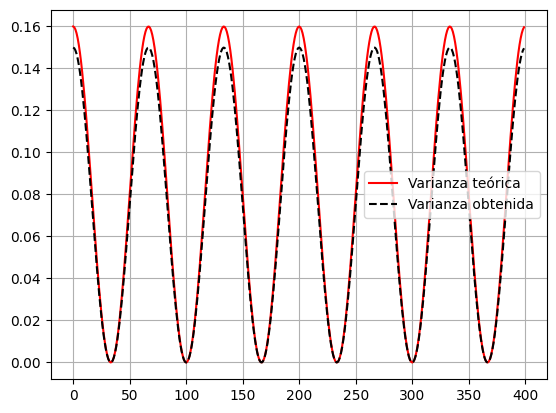

In [134]:
#varianza
plt.plot(n, 0.16*np.cos(w0 * n)**2, label = 'Varianza teórica', color = 'red')
var_obt = np.var(X, axis = 0)
plt.plot(n, var_obt, label = 'Varianza obtenida', color = 'black', linestyle = '--')

plt.grid(True)
plt.legend()
plt.show()

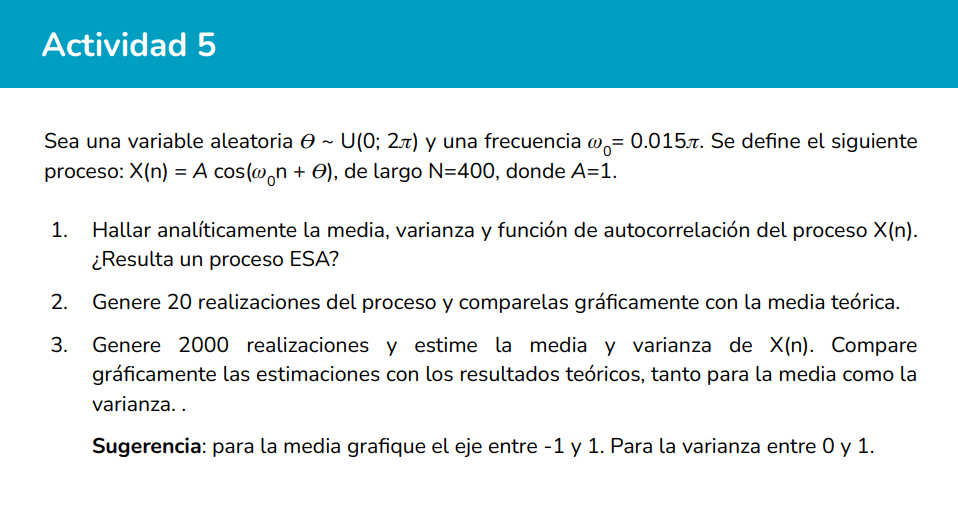

### Esperanza

$
E[Acos(\omega_0n + \Theta)] = A E[cos(\omega_0 n + \Theta)] = A \int_{0}^{2\pi} cos(\omega_0 n + \theta) f_{\Theta}(\theta) d\theta = A \int_{0}^{2\pi} \frac{1}{2\pi} cos(\theta + \omega_0 n)d\theta = 0
$

Da cero xq estoy integrando sobre $\theta$. Para cualquier fase $\omega_0 n$ si integro sobre un período me da cero

### Varianza

$
V[X(n)] = E[X^2(n)] - E[X(n)]^2 = E[X^2(n)] = E[A^2cos(\Theta + \omega_0 n)^2] = A^2\int_{0}^{2\pi} cos^2(\omega_0 n + \theta) f_{\Theta}(\theta) d\theta = A^2 \int_{0}^{2\pi} \frac{1}{2\pi} cos^2(\theta + \omega_0 n)d\theta = \frac{A^2}{2} 
$

Para mi da eso. El valor medio del coseno cuadrado es 1/2

Podría ser un proceso ESA, pero para poder asegurarlo tengo que ver la autocorrelación

### Función de autocorrelación

Bueno, lo hice en rnote xq es bastante largo y no tegno tantas ganas de escribir en latex

La cuetión es que da:

$
R(n, k) = E[X(n)X(k)] = \frac{1}{2}cos(\omega_0\tau)
$

Donde $\tau = k - n$ (aunque si lo definis como $\tau = n - k$ da lo mismo)

==> El proceso es ESA. Sape, como quien diría

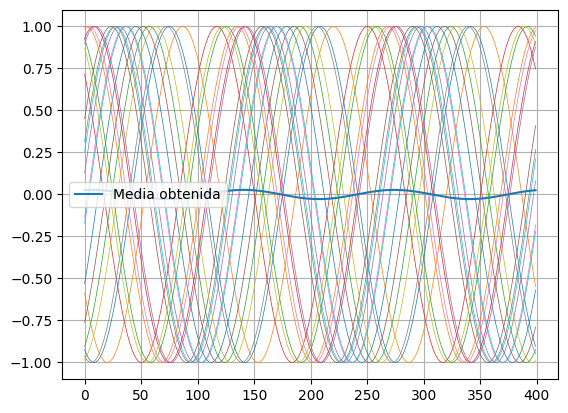

In [145]:
w0 = 0.015 * np.pi
N = 400
R = 2000

tita = np.random.uniform(low = 0, high = 2*np.pi, size = R)#vector con valores de tita
n = np.arange(N) #vector de tiempos
X = np.zeros(shape = (R, N))

for i in range(R):
    X[i] = np.cos(w0 * n + tita[i])

for i in range(20):
    plt.plot(n, X[i], linewidth = 0.5)

mu_obt = np.mean(X, axis = 0)
plt.plot(n, mu_obt, label = 'Media obtenida')

plt.legend()
plt.grid(True)
plt.show()

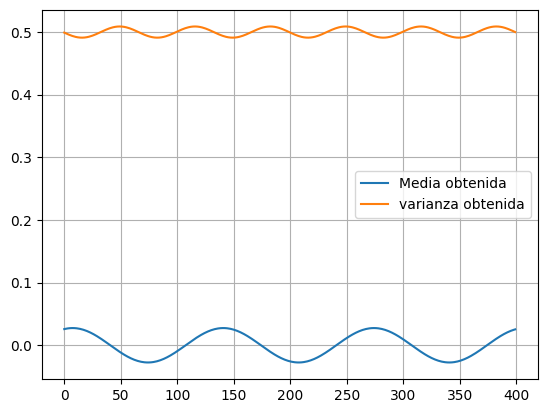

In [146]:
mu_obt = np.mean(X, axis = 0)
plt.plot(n, mu_obt, label = 'Media obtenida')

var_obt = np.var(X, axis = 0)
plt.plot(n, var_obt, label = 'varianza obtenida')

plt.legend()
plt.grid(True)
plt.show()

OBS: Cuantas más realizaciones haga, más me acerco al resultado analítico. Si hago pocas me alejo bastante

OBS2: La varianza es la correlación en $\tau = 0$